In [347]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils.chromo_cv_utils import cv_imread, cv_imwrite

In [348]:
OTSU_PLUS = 20
CNT_AREA_MIN = 100
CNT_AREA_MAX = 10000

In [349]:
# 读取图片
# img_fp = 'E:/染色体测试数据/241021-染色体畸变数据-cv办法找染色体/2024_10_16_20_54_21_670fa80ec4ba273a0afb8d02_00587.jpg'
# img_fp = 'E:/染色体测试数据/241021-染色体畸变数据-cv办法找染色体/2024_10_16_20_54_46_670fa80ec4ba273a0afb8d02_00591.jpg'
img_fp = 'E:/染色体测试数据/241021-染色体畸变数据-cv办法找染色体/2024_10_16_20_55_25_670fa80ec4ba273a0afb8d02_00597.jpg'
img_fn = os.path.basename(img_fp)
img_fn = os.path.splitext(img_fn)[0]
img_fext = os.path.splitext(img_fp)[1]
img_fdir = os.path.dirname(img_fp)
img_lst = []
img = cv_imread(img_fp)

In [350]:
# 灰化，二值化
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
binary_val = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[0] # cv2.THRESH_TRIANGLE, cv2.THRESH_OTSU
binary = cv2.threshold(gray, binary_val+OTSU_PLUS, 255, cv2.THRESH_BINARY_INV)[1]

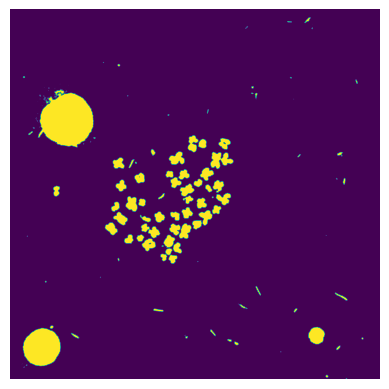

In [351]:
# 显示图片
plt.imshow(binary)
plt.axis('off')  # 关闭坐标轴
plt.show()

In [352]:
# 在二值化图上求轮廓，然后将轮廓画在原图上
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
canvas = img.copy()
cv2.drawContours(canvas, contours, -1, (0, 0, 255), 2)
len(contours)

246

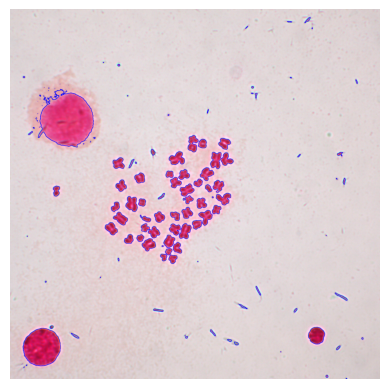

In [353]:
# 显示图片
plt.imshow(canvas)
plt.axis('off')  # 关闭坐标轴
plt.show()

In [354]:
# 保存被画上轮廓的图片
save_fp = os.path.join(img_fdir, f'{img_fn}_contours{img_fext}')
cv_imwrite(save_fp, canvas)

In [355]:
# 根据轮廓大小来过滤
cnt_areas = [cv2.contourArea(cnt) for cnt in contours]
filtered_contours = [cnt for cnt in contours if CNT_AREA_MIN < cv2.contourArea(cnt) < CNT_AREA_MAX]
max(cnt_areas), min(cnt_areas), len(filtered_contours)

(106125.0, 0.0, 69)

In [356]:
# 在原图上画出被过滤的轮廓
canvas = img.copy()
cv2.drawContours(canvas, filtered_contours, -1, (0, 255, 0), 2) # BGR
len(filtered_contours)

69

In [357]:
# 保存
save_fp = os.path.join(img_fdir, f'{img_fn}_filtered_contours_{OTSU_PLUS}_{CNT_AREA_MIN}_{CNT_AREA_MAX}_{img_fext}')
cv_imwrite(save_fp, canvas)